In [ ]:
import os
os.chdir('..')
from notebooks import config
import shutil
import glob
import matplotlib.pyplot as plt
from utils.imgShow import imgShow
from utils.raster_vec import vec2mask, raster2vec
from utils.geotif_io import readTiff, writeTiff



### Padding

In [10]:
# idx = '01'

for idx in ['01','02','03','04','05','06','07','08','09','10','11','12','13',\
            '14','15','16','17','18','19','20','21','22','23']:
  print('scene ' + idx)

  ### 1.read in data
  as_path = config.root_proj + '/data/dset/s1_ascend/s1as_scene' + idx + '.tif'
  des_path = config.root_proj + '/data/dset/s1_descend/s1des_scene' + idx + '.tif'
  as_pad_path = config.root_proj + '/data/dset/s1_ascend/s1as_scene' + idx + '_pad.tif'
  des_pad_path = config.root_proj + '/data/dset/s1_descend/s1des_scene' + idx + '_pad.tif'
  s1as_img, s1as_img_info = readTiff(path_in = as_path)
  s1des_img, s1des_img_info = readTiff(path_in = des_path)

  ### 2. calculate new padded extent
  pixel_pad = 894
  x_res, y_res = abs(s1as_img_info['geotrans'][1]), abs(s1as_img_info['geotrans'][5])
  left_up = [s1as_img_info['geoextent'][0], s1as_img_info['geoextent'][3]]
  right_down = [s1as_img_info['geoextent'][1], s1as_img_info['geoextent'][2]]
  left_up_pad = [left_up[0]-x_res*pixel_pad, left_up[1]+y_res*pixel_pad]
  right_down_pad = [right_down[0]+x_res*pixel_pad, right_down[1]-y_res*pixel_pad]

  ### 3. padding by using gdal_translate tool
  extent = str(left_up_pad[0])+' '+str(left_up_pad[1])+' '+str(right_down_pad[0])+' '+str(right_down_pad[1]) 
  command_as = 'gdal_translate -projwin ' + extent + ' -a_nodata -100' + ' ' + as_path + ' ' + as_pad_path
  command_des = 'gdal_translate -projwin ' + extent + ' -a_nodata -100' +  ' ' + des_path + ' ' + des_pad_path
  print(os.popen(command_as).read())
  print(os.popen(command_des).read())


scene 01
Input file size is 3632, 3306
0...10...20...30...40...50...60...70...80...90...100 - done.

Input file size is 3632, 3306
0...10...20...30...40...50...60...70...80...90...100 - done.

scene 02
Input file size is 3874, 3472
0...10...20...30...40...50...60...70...80...90...100 - done.

Input file size is 3874, 3472
0...10...20...30...40...50...60...70...80...90...100 - done.

scene 03
Input file size is 3962, 3509
0...10...20...30...40...50...60...70...80...90...100 - done.

Input file size is 3962, 3509
0...10...20...30...40...50...60...70...80...90...100 - done.

scene 04
Input file size is 3811, 3333
0...10...20...30...40...50...60...70...80...90...100 - done.

Input file size is 3811, 3333
0...10...20...30...40...50...60...70...80...90...100 - done.

scene 05
Input file size is 3223, 3099
0...10...20...30...40...50...60...70...80...90...100 - done.

Input file size is 3223, 3099
0...10...20...30...40...50...60...70...80...90...100 - done.

scene 06
Input file size is 4084, 3

s1as_pad_img size: (5165, 5478, 2)
s1des_pad_img size: (5165, 5478, 2)


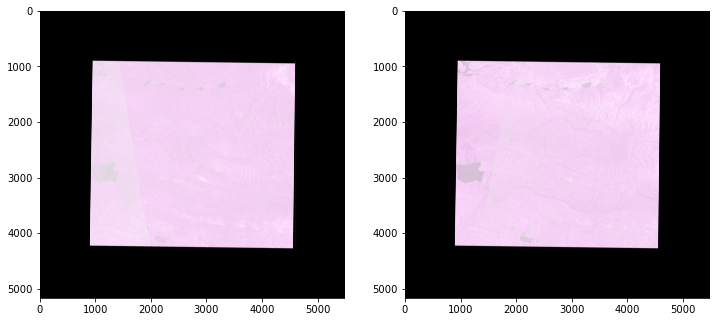

In [11]:
## check
idx = '21'

as_pad_path = config.root_proj + '/data/dset/s1_ascend/s1as_scene' + idx + '_pad.tif'
des_pad_path = config.root_proj + '/data/dset/s1_descend/s1des_scene' + idx + '_pad.tif'
s1as_pad_img, s1as_pad_img_info = readTiff(path_in = as_pad_path)
s1des_pad_img, s1des_pad_img_info = readTiff(path_in = des_pad_path)
print('s1as_pad_img size:',s1as_pad_img.shape)
print('s1des_pad_img size:', s1des_pad_img.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
imgShow(s1as_pad_img,color_bands=(0,1,0))
plt.subplot(1,2,2)
imgShow(s1des_pad_img,color_bands=(0,1,0))



### Vector to mask

In [ ]:
# ## vector to mask (truth image)
# # idx = '23'
# for idx in ['01','02','03','04','05','06','07','08','09','10','11','12','13',\
#             '14','15','16','17','18','19','20','21','22','23']:
#   print('scene ' + idx)
#   vec_path = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.gpkg'
#   base_raster_path = config.root_proj + '/data/dset/s1_ascend/s1as_scene' + idx + '_pad.tif'
#   output_path = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_pad_wat_truth.tif'
#   mask = vec2mask(vec_path, base_raster_path, output_path)



In [ ]:
# ## check
# idx = '21'
# base_raster_path = config.root_proj + '/data/dset/s1_ascend/s1as_scene' + idx + '_pad.tif'
# output_path = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
# s1as_pad_img, s1as_pad_img_info = readTiff(path_in = base_raster_path)
# s1_truth, s1_truth_info = readTiff(path_in = output_path)
# plt.figure(figsize=(12, 6))
# plt.subplot(1,2,1)
# imgShow(s1as_pad_img, color_bands=(0,1,0))
# plt.subplot(1,2,2)
# imgShow(s1_truth, color_bands=(0,1,0))



### Mask to vector

In [ ]:
# ## image (truth image) to vector

# # idx = '20'
# for idx in ['01','02','03','04','05','06','07','08','09','10',\
#             '11','12','13','14','15','16','17','18','19','20',\
#             '21','22','23']:

#   image_path = config.root_proj + '/s1_water_/scene' + idx + '_water.tif'
#   vec_path = config.root_proj + '/s1_water_/scene' + idx + '_water.gpkg'

#   raster2vec(raster_path=image_path, output_path=vec_path, dn_values=[1])
